Mean Squared Error: 76559.00
R-squared Score: -9.38


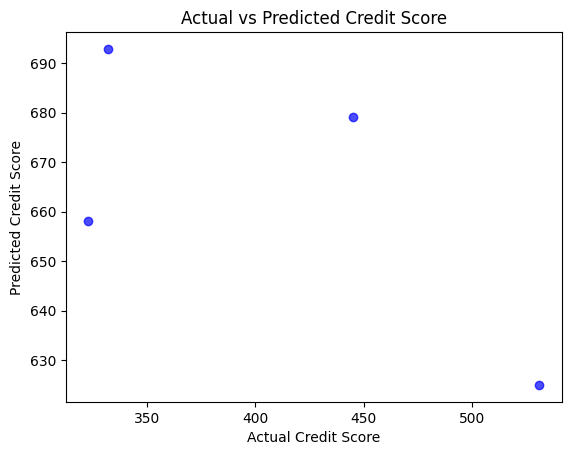

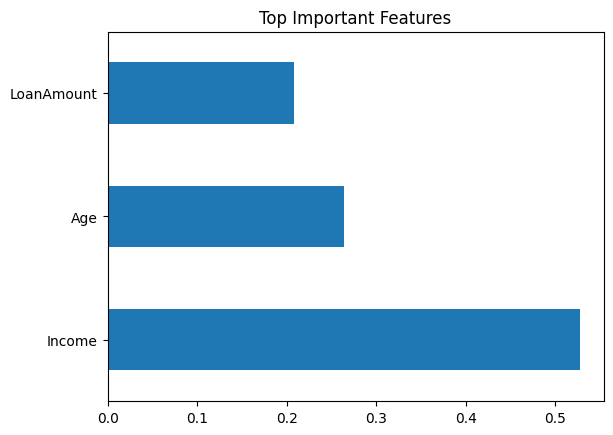

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the provided CSV file
# This dataset contains information about customers and their credit scores
# Columns: CustomerID, Age, Income, LoanAmount, CreditScore

data = pd.read_csv('/content/credit_data.csv')

# Drop the 'CustomerID' column as it does not contribute to the prediction
# This column is simply an identifier and has no impact on the credit score

data.drop('CustomerID', axis=1, inplace=True)

# Split the data into features (X) and target (y)
# Features are the columns used to predict the target variable (CreditScore)
# Target is the column we want to predict (CreditScore)

X = data.drop('CreditScore', axis=1)
y = data['CreditScore']

# Split the data into training and testing sets
# Training set (80%) is used to train the model
# Testing set (20%) is used to evaluate the model's performance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
# Random Forest is an ensemble learning method that uses multiple decision trees
# It improves prediction accuracy and reduces overfitting

model = RandomForestRegressor()

# Train the model using the training data
# The model will learn patterns from the training data

model.fit(X_train, y_train)

# Predict the Credit Score on the test set
# The model will now use the test data to predict the Credit Score

y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R-squared Score (R2)
# MSE measures the average squared difference between actual and predicted values
# R2 score measures how well the model fits the data (closer to 1 is better)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model performance metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

# Plot the Actual vs Predicted Credit Score
# This graph shows how close the predicted values are to the actual values

plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.title('Actual vs Predicted Credit Score')
plt.show()

# Plot the Feature Importance
# This graph shows which features (Age, Income, LoanAmount) contributed the most
# to predicting the Credit Score

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top Important Features')
plt.show()
